# Kasra Samadi 993623030 
# HW3 DataMining
# Chapter 4 : CLUSTERING

## Tasks : 
### 1- Read data set-4.csv
### 2- Obtaining information (#Rows, #Columns, Types of Columns, describe of dataFrame, Missing values, Inconsistent datas)
### 3- K_Means
### 4- K_Medians
### 5- DBSCAN 


# Task 1 And 2

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Reading data set-4.csv

In [2]:
df = pd.read_csv("data set-4.csv")


## Missing datas are marked with NaN

In [3]:
df


,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


## This dataFrame has 547 rows and 3 columns

In [4]:
df.shape


(547, 3)

## Find columns names and their types

In [5]:
df.dtypes


Weight         int64
Cholesterol    int64
Gender         int64
dtype: object

## Show The describe of this dataFrame

In [6]:
df.describe()


,Weight,Cholesterol,Gender
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


## Find the number of missing values for each columns
### There are no missing values AND Inconsistent datas in this dataFrame

In [7]:
df.isna().sum()


Weight         0
Cholesterol    0
Gender         0
dtype: int64

In [8]:
print(df["Weight"].value_counts())
print(df["Cholesterol"].value_counts())
print(df["Gender"].value_counts())


154    11
100    11
134    10
180     9
115     9
       ..
164     1
143     1
193     1
95      1
162     1
Name: Weight, Length: 106, dtype: int64
222    11
110    10
204    10
214     8
211     8
       ..
198     1
234     1
119     1
210     1
137     1
Name: Cholesterol, Length: 131, dtype: int64
1    281
0    266
Name: Gender, dtype: int64


## Create Scatter Plot to visualize data points relations 

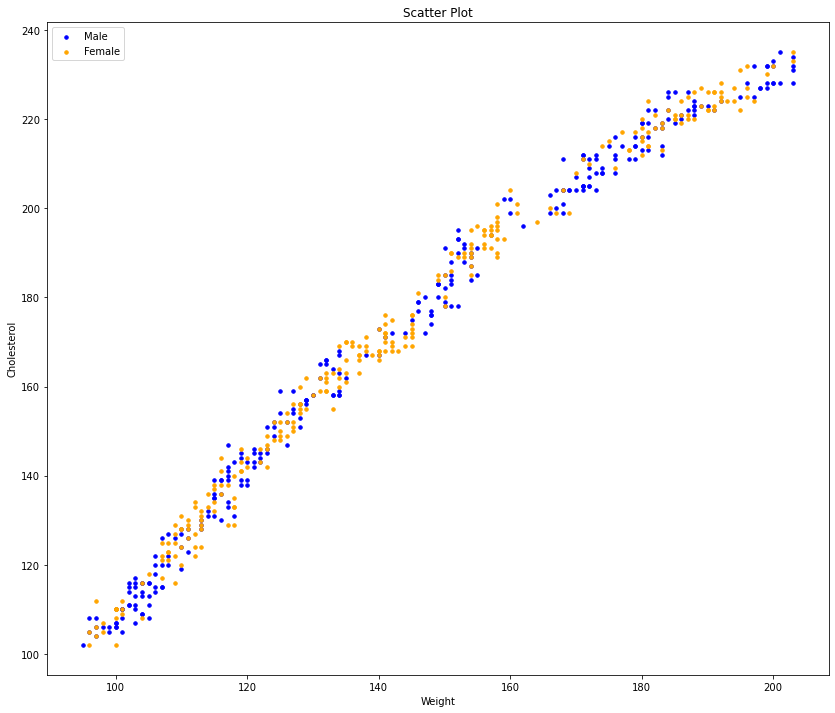

In [9]:
import matplotlib.pyplot as plt

# Filter the dataframe by gender
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

plt.figure(figsize=(14, 12))
# Create a scatter plot for male data points
plt.scatter(male_df['Weight'], male_df['Cholesterol'], c='blue', label='Male', s=12)

# Create a scatter plot for female data points
plt.scatter(female_df['Weight'], female_df['Cholesterol'], c='Orange', label='Female', s=12)

plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot')

plt.legend()
plt.show()


# Task 3 : K_Means

## sklearn KMeans Clustering

In [10]:
from sklearn.cluster import KMeans

data = df[['Weight', 'Cholesterol', 'Gender']].values

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

# Get the cluster assignments for each data point
assignments = kmeans.labels_

# Calculate the number of items in each cluster
cluster_counts = np.bincount(assignments)

# Calculate the mean of each cluster
cluster_centers = kmeans.cluster_centers_


In [11]:
# Print the number of items and mean of each cluster
total=0
for cluster in range(num_clusters):
    count = cluster_counts[cluster]
    total+=count
    mean = cluster_centers[cluster]
    print(f"Cluster {cluster+1}: {count} items, Mean: Weight = {mean[0]:.3f}, Cholesterol = {mean[1]:.3f}, Gender = {mean[2]:.3f}")

print(f"\nTotal Number of Items: {total}")

Cluster 1: 118 items, Mean: Weight = 152.093, Cholesterol = 185.907, Gender = 0.441
Cluster 2: 135 items, Mean: Weight = 127.726, Cholesterol = 154.385, Gender = 0.459
Cluster 3: 154 items, Mean: Weight = 184.318, Cholesterol = 218.916, Gender = 0.591
Cluster 4: 140 items, Mean: Weight = 106.850, Cholesterol = 119.536, Gender = 0.543

Total Number of Items: 547


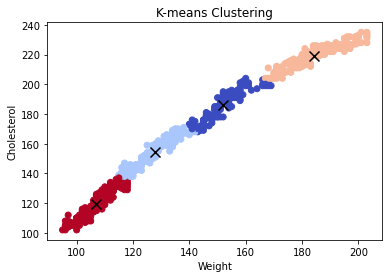

In [12]:
plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='coolwarm')#viridis
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100)
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('K-means Clustering')
plt.show()

# Task 4 : K_Medians

## KMedians Clustering Implementation
                                

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin_min

def k_medians(X, n_clusters, max_iters=100):
    np.random.seed(40)
    centers = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    for _ in range(max_iters):
        # Assign each sample to the nearest cluster center based on euclidean distance
        labels = pairwise_distances_argmin_min(X, centers, metric='euclidean')[0]
        # Update cluster centers as medians of the samples in each cluster
        new_centers = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return labels, centers


data = df[['Weight', 'Cholesterol', 'Gender']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Set the number of clusters (k)
k = 4

# Apply k-medians clustering
labels, centers = k_medians(scaled_data, k)

# Print the number of items and mean of each cluster
num_clusters = len(centers)
cluster_counts = np.bincount(labels)
cluster_centers = scaler.inverse_transform(centers)

total = 0
for cluster in range(num_clusters):
    count = cluster_counts[cluster]
    total += count
    mean = cluster_centers[cluster]
    print(f"Cluster {cluster+1}: {count} items, Mean: Weight = {mean[0]:.3f}, Cholesterol = {mean[1]:.3f}, Gender = {mean[2]:.3f}")

print(f"\nTotal Number of Items: {total}")

Cluster 1: 109 items, Mean: Weight = 179.000, Cholesterol = 214.000, Gender = 1.000
Cluster 2: 79 items, Mean: Weight = 105.000, Cholesterol = 116.000, Gender = 1.000
Cluster 3: 93 items, Mean: Weight = 132.000, Cholesterol = 159.000, Gender = 1.000
Cluster 4: 266 items, Mean: Weight = 140.000, Cholesterol = 169.000, Gender = 0.000

Total Number of Items: 547


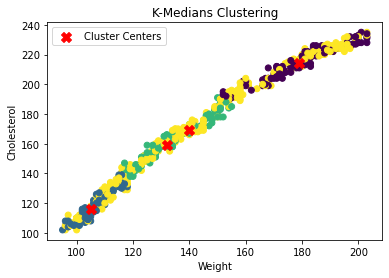

In [14]:
# Extract the original unscaled data for plotting
unscaled_data = scaler.inverse_transform(scaled_data)
# Extract the coordinates of the cluster centers
unscaled_centers = scaler.inverse_transform(centers)
plt.scatter(unscaled_data[:, 0], unscaled_data[:, 1], c=labels)
plt.scatter(unscaled_centers[:, 0], unscaled_centers[:, 1], c='red', marker='X', s=100, 
            label='Cluster Centers')
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('K-Medians Clustering')
plt.legend()
plt.show()

# Task 5 : DBSCAN

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = df[['Weight', 'Cholesterol', 'Gender']].values

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

dbscan = DBSCAN(eps=0.08, min_samples=10)

dbscan.fit(scaled_features)

# Retrieve the cluster labels and unique labels
labels = dbscan.labels_
unique_labels = set(labels) - {-1}


In [16]:
total = 0
for cluster in unique_labels:
    count = (labels == cluster).sum()
    total += count
    cluster_data = data[labels == cluster]
    mean = np.mean(cluster_data, axis=0)
    
    print(f"Cluster {cluster}: {count} items, Mean: Weight = {mean[0]:.3f}, Cholesterol = {mean[1]:.3f}, Gender = {mean[2]:.3f}")

print(f"\nTotal Number of Items: {total}")

Cluster 0: 31 items, Mean: Weight = 103.548, Cholesterol = 113.097, Gender = 1.000
Cluster 1: 14 items, Mean: Weight = 191.286, Cholesterol = 224.357, Gender = 0.000
Cluster 2: 21 items, Mean: Weight = 156.619, Cholesterol = 193.952, Gender = 0.000
Cluster 3: 28 items, Mean: Weight = 139.250, Cholesterol = 168.893, Gender = 0.000
Cluster 4: 10 items, Mean: Weight = 108.100, Cholesterol = 123.100, Gender = 0.000
Cluster 5: 19 items, Mean: Weight = 170.895, Cholesterol = 205.474, Gender = 1.000
Cluster 6: 15 items, Mean: Weight = 111.200, Cholesterol = 128.333, Gender = 0.000
Cluster 7: 13 items, Mean: Weight = 98.846, Cholesterol = 106.077, Gender = 1.000
Cluster 8: 10 items, Mean: Weight = 185.900, Cholesterol = 220.800, Gender = 0.000
Cluster 9: 10 items, Mean: Weight = 132.300, Cholesterol = 161.000, Gender = 0.000
Cluster 10: 11 items, Mean: Weight = 125.182, Cholesterol = 150.000, Gender = 0.000
Cluster 11: 10 items, Mean: Weight = 152.400, Cholesterol = 190.500, Gender = 1.000
Clu

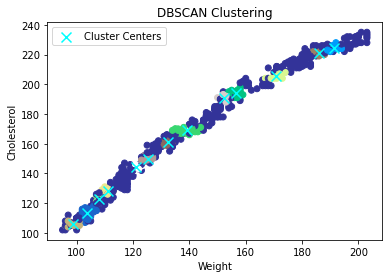

In [17]:
# Compute cluster centers
centers = []
for cluster in unique_labels:
    cluster_data = data[labels == cluster]
    cluster_center = np.mean(cluster_data, axis=0)
    centers.append(cluster_center)
centers = np.array(centers)
# Plot the clusters and centers
plt.scatter(data[:, 0], data[:, 1], c=labels , cmap='terrain')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='cyan', s=100, label='Cluster Centers')
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()